In [1]:
# from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
import h5py as h5
import time
import sys
import copy
#Quick fudge to make import from ../Scripts work
import sys
sys.path.append('../../Scripts')

import pandas as pd 
import string
from PostProcessingScripts import * 
from formation_channels import * 


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [10]:
print(0.0143*2)

0.0286


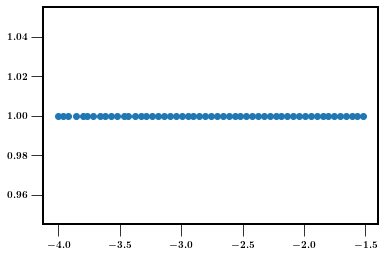

In [2]:
listt=np.asarray([0.0001, 0.00011, 0.00012, 0.00014, 0.00016, 0.00017,\
       0.00019, 0.00022, 0.00024, 0.00027, 0.0003, 0.00034, \
       0.00037, 0.00042, 0.00047, 0.00052, 0.00058, 0.00065,\
       0.00073, 0.00081, 0.0009, 0.00101, 0.00113, 0.00126,\
       0.0014, 0.00157, 0.00175, 0.00195, 0.00218, 0.00243, \
       0.00272, 0.00303, 0.00339, 0.00378, 0.00422, 0.00471, \
       0.00526, 0.00587, 0.00655, 0.00732, 0.00817, 0.00912, \
       0.01018, 0.01137, 0.01269, 0.01416, 0.01581, 0.01765, 0.01971, 0.022, 0.0244, 0.02705, 0.03])




plt.scatter(np.log10(listt), np.ones_like(listt))

plt.show()


In [3]:



        

def obtain_xvar(fdata=None, xparam='Mass1'): 
    """ 
    Calculate confidence intervals  (distribution quantiles) summary 
    input:
    

    """
    

    if xparam in ['Mass1', 'Mass2', 'q', 'ChirpMass', 'Mtot']:

        # obtain BH and NS masses
        xvar1 = fdata['doubleCompactObjects']['M1'][...].squeeze()
        xvar2 = fdata['doubleCompactObjects']['M2'][...].squeeze()
        M1, M2 = obtainM1BHandM2BHassymetric(m1=xvar1, m2=xvar2) # M1 will be the most massive, M2 the least massive compact object. 
        del xvar1
        del xvar2
        if xparam =='Mtot':
            xvar=M1+M2
        elif xparam=='Mass1':
            xvar = M1
        elif xparam=='Mass2':
            xvar = M2 
        elif xparam =='q':
            xvar = M1/M2
        elif xparam=='ChirpMass':
            xvar = chirpmass(M1,M2)

        del M1
        del M2


    elif xparam=='log10metallicitySystems':
        ZZ = fdata['doubleCompactObjects']['Metallicity1'][...].squeeze()
        xvar = np.log10((ZZ))
        del ZZ 

    elif xparam=='metallicitySystems':
        ZZ = fdata['doubleCompactObjects']['Metallicity1'][...].squeeze()
        xvar = ((ZZ))
        del ZZ


    elif xparam=='tc':
        tc = fdata['doubleCompactObjects']['tc'][...].squeeze()
        xvar = tc / 1000. # in Gyr. 
        del tc

    elif xparam=='tdelay':
        tc = fdata['doubleCompactObjects']['tc'][...].squeeze()
        tform = fdata['doubleCompactObjects']['tform'][...].squeeze()
        xvar = (tc/1000) + (tform / 1000) # in Gyr 
        del tc 
        del tform
    else:
        print('KeyError')


      

    return xvar 




def make_up_axis(axe=None, axe_ind=0, BPSmodelNames=['A'], xlim=[1,3.], ylim=[0.1,10], nameX='xname', nameY='yname', logY=False, logX=False):
    for ind_bps, bps_name in enumerate(BPSnameslist):
        
        axe = ax[ind_bps, axe_ind]
#         if ind_bps 

                
        if logY==True:
            axe.set_yscale('log')
        if logX==True:
            axe.set_xscale('log')
        if xlim:
            axe.set_xlim(xlim[0], xlim[1])
        if ylim:
            axe.set_ylim(ylim[0], ylim[1])
        
        if bps_name != BPSmodelNames[-1]:
            
            axe.set_xticklabels( () )
            axe.set_xticks([])

            axe.set_yticks([])
            axe.set_yticklabels( () )
            
        
        
        
        
        if  (nameX==None):

            axe.set_xticklabels( () )
            axe.set_xticks([])

        elif (nameY==None):
            axe.set_yticks([])
            axe.set_yticklabels( () )   
            
            
#         if (nameX!=None) & (nameY==None):
#             layoutAxesNoYlabel()

    return 





def make_up_axis_single_ax(axe=None, bps_name='A', BPSmodelNames=['A'], xlim=[1,3.], ylim=[0.1,10], nameX='xname', nameY='yname', logY=False, logX=False):

#         if ind_bps 


    if logY==True:
        axe.set_yscale('log')
    if logX==True:
        axe.set_xscale('log')
    if xlim:
        axe.set_xlim(xlim[0], xlim[1])
    if ylim:
        axe.set_ylim(ylim[0], ylim[1])

#     if bps_name != BPSmodelNames[-1]:

#         axe.set_xticklabels( () )
#         axe.set_xticks([])

#         axe.set_yticks([])
#         axe.set_yticklabels( () )




#     else:
    if  (nameX==None):
        axe.set_xticklabels( () )
        axe.set_xticks([])

    elif (nameY==None):
        axe.set_yticks([])
        axe.set_yticklabels( () )   




    return 








def make_up_axis_single_ax(axe=None, bps_name='A', BPSmodelNames=['A'], xlim=[1,3.], ylim=[0.1,10], nameX='xname', nameY='yname', logY=False, logX=False):

#         if ind_bps 


    if logY==True:
        axe.set_yscale('log')
    if logX==True:
        axe.set_xscale('log')
    if xlim:
        axe.set_xlim(xlim[0], xlim[1])
    if ylim:
        axe.set_ylim(ylim[0], ylim[1])

#     if bps_name != BPSmodelNames[-1]:

#         axe.set_xticklabels( () )
#         axe.set_xticks([])

#         axe.set_yticks([])
#         axe.set_yticklabels( () )




#     else:
    if  (nameX==None):
        axe.set_xticklabels( () )
        axe.set_xticks([])

    elif (nameY==None):
        axe.set_yticks([])
        axe.set_yticklabels( () )   




    return 





        
def plotPercentiles(ax=0, axe_ind=0, xparam="Mass1", BPSnameslist=['A'],  DCOtype='BHNS', path_dir = '/Volumes/Andromeda/DATA/AllDCO_bugfix/'):

#     constants
    solar = 0.0143
    channelColorDict = {1:'#118AB2', 2:'#EF476F', 3:'#FFD166', 4:'#073B4C', 0:'gray'}

    
    
    for ind_m, BPSmodelName in enumerate(BPSnameslist):

        
        axe = ax[ind_m,axe_ind]
        
        
        # data for KDE / PDF:
        path_ = path_dir + alphabetDirDict[BPSmodelName] +'/'
        path  = path_ + 'COMPASCompactOutput_'+ DCOtype +'_' + BPSmodelName + '.h5'   
        fdata = h5.File(path)

        # obtain 
        xvar = obtain_xvar(fdata, xparam)
        metallicities = fdata['doubleCompactObjects']['Metallicity1'][...].squeeze()

        # obtain formation channels 
        seeds = fdata['doubleCompactObjects']['seed'][...].squeeze()
        channels = identify_formation_channels(seeds=seeds, file=fdata)

        # obtain sampling weights 
        weights =  fdata['doubleCompactObjects']['weight'][...].squeeze()



        # quantiles that I want to know
        y_quantiles  =          [0.005,   0.05,   0.16,   0.25,   0.5,   0.75,   0.84,   0.95,  0.995]
        indexnames   = ['unit', '0.005', '0.05', '0.16', '0.25', '0.5', '0.75', '0.84', '0.95', '0.995']





        Nbars = 12 # no channels times 2 for metallicities 
        dx = 0.45 #0.3
        dxrange = np.linspace(-dx, +dx, Nbars+1) #+ ind_m
        dxlen = (2*dx)/Nbars



        ind_xx = 0 
        for nrC, Channel in enumerate(list(np.unique(channels))):              
        #           #Get the seeds that relate to sorted indices


            for ind_z, Zrange in enumerate(['highZ', 'lowZ']):



                if Zrange=='highZ':
                    Zmin, Zmax = solar/2, solar*2
                    xx = dxrange[ind_xx] + 0.6 # offset for high Z 
                elif Zrange=='lowZ': 
                    Zmin, Zmax = (0.1*solar)/2, (0.1*solar)*2
                    xx = dxrange[ind_xx]

                mask_  = (channels==Channel) & (metallicities>=Zmin) & (metallicities<=Zmax)
                if np.sum(mask_)>0:
                    xvar_quantiles = weighted_quantile(values=xvar[mask_], quantiles=y_quantiles, sample_weight=weights[mask_])    

                    q0_005, q0_05, q0_16, q0_25, q0_5, q0_75, q0_84, q0_95, q0_995 = xvar_quantiles

                    # plot the vertical bars 
                    for ind_q, interval in enumerate(['99percent', '90percent', '50percent', 'median']):


                        if interval=='median':                     
                            axe.scatter(q0_5, xx, \
                                        c=np.array([channelColorDict[Channel]]), s=120, label=None, \
                                        marker='.', zorder=200)  

                        elif interval =='99percent':
                            zorder = 102
                            yy = [q0_005, q0_995]
                            alpha = 0.15
                        elif interval=='90percent':
                            zorder = 105
                            yy = [q0_05, q0_95]
                            alpha = 0.25    
                        elif interval=='50percent':
                            zorder = 110
                            yy = [q0_25, q0_75]
                            alpha = 0.4                         

                        axe.barh(xx, width=(yy[1]-yy[0]), left=yy[0], color='white', alpha=1, \
                               height=dxlen, zorder=zorder-1)
                        axe.barh(xx, width=(yy[1]-yy[0]), left=yy[0], color=channelColorDict[Channel], alpha=alpha, \
                               height=dxlen, zorder=zorder)




#                     print('channel %s'%Channel,  xvar_quantiles)

            ind_xx+=1 

        fdata.close()



    

    print('finished')


    
    return












finished
finished
finished
finished


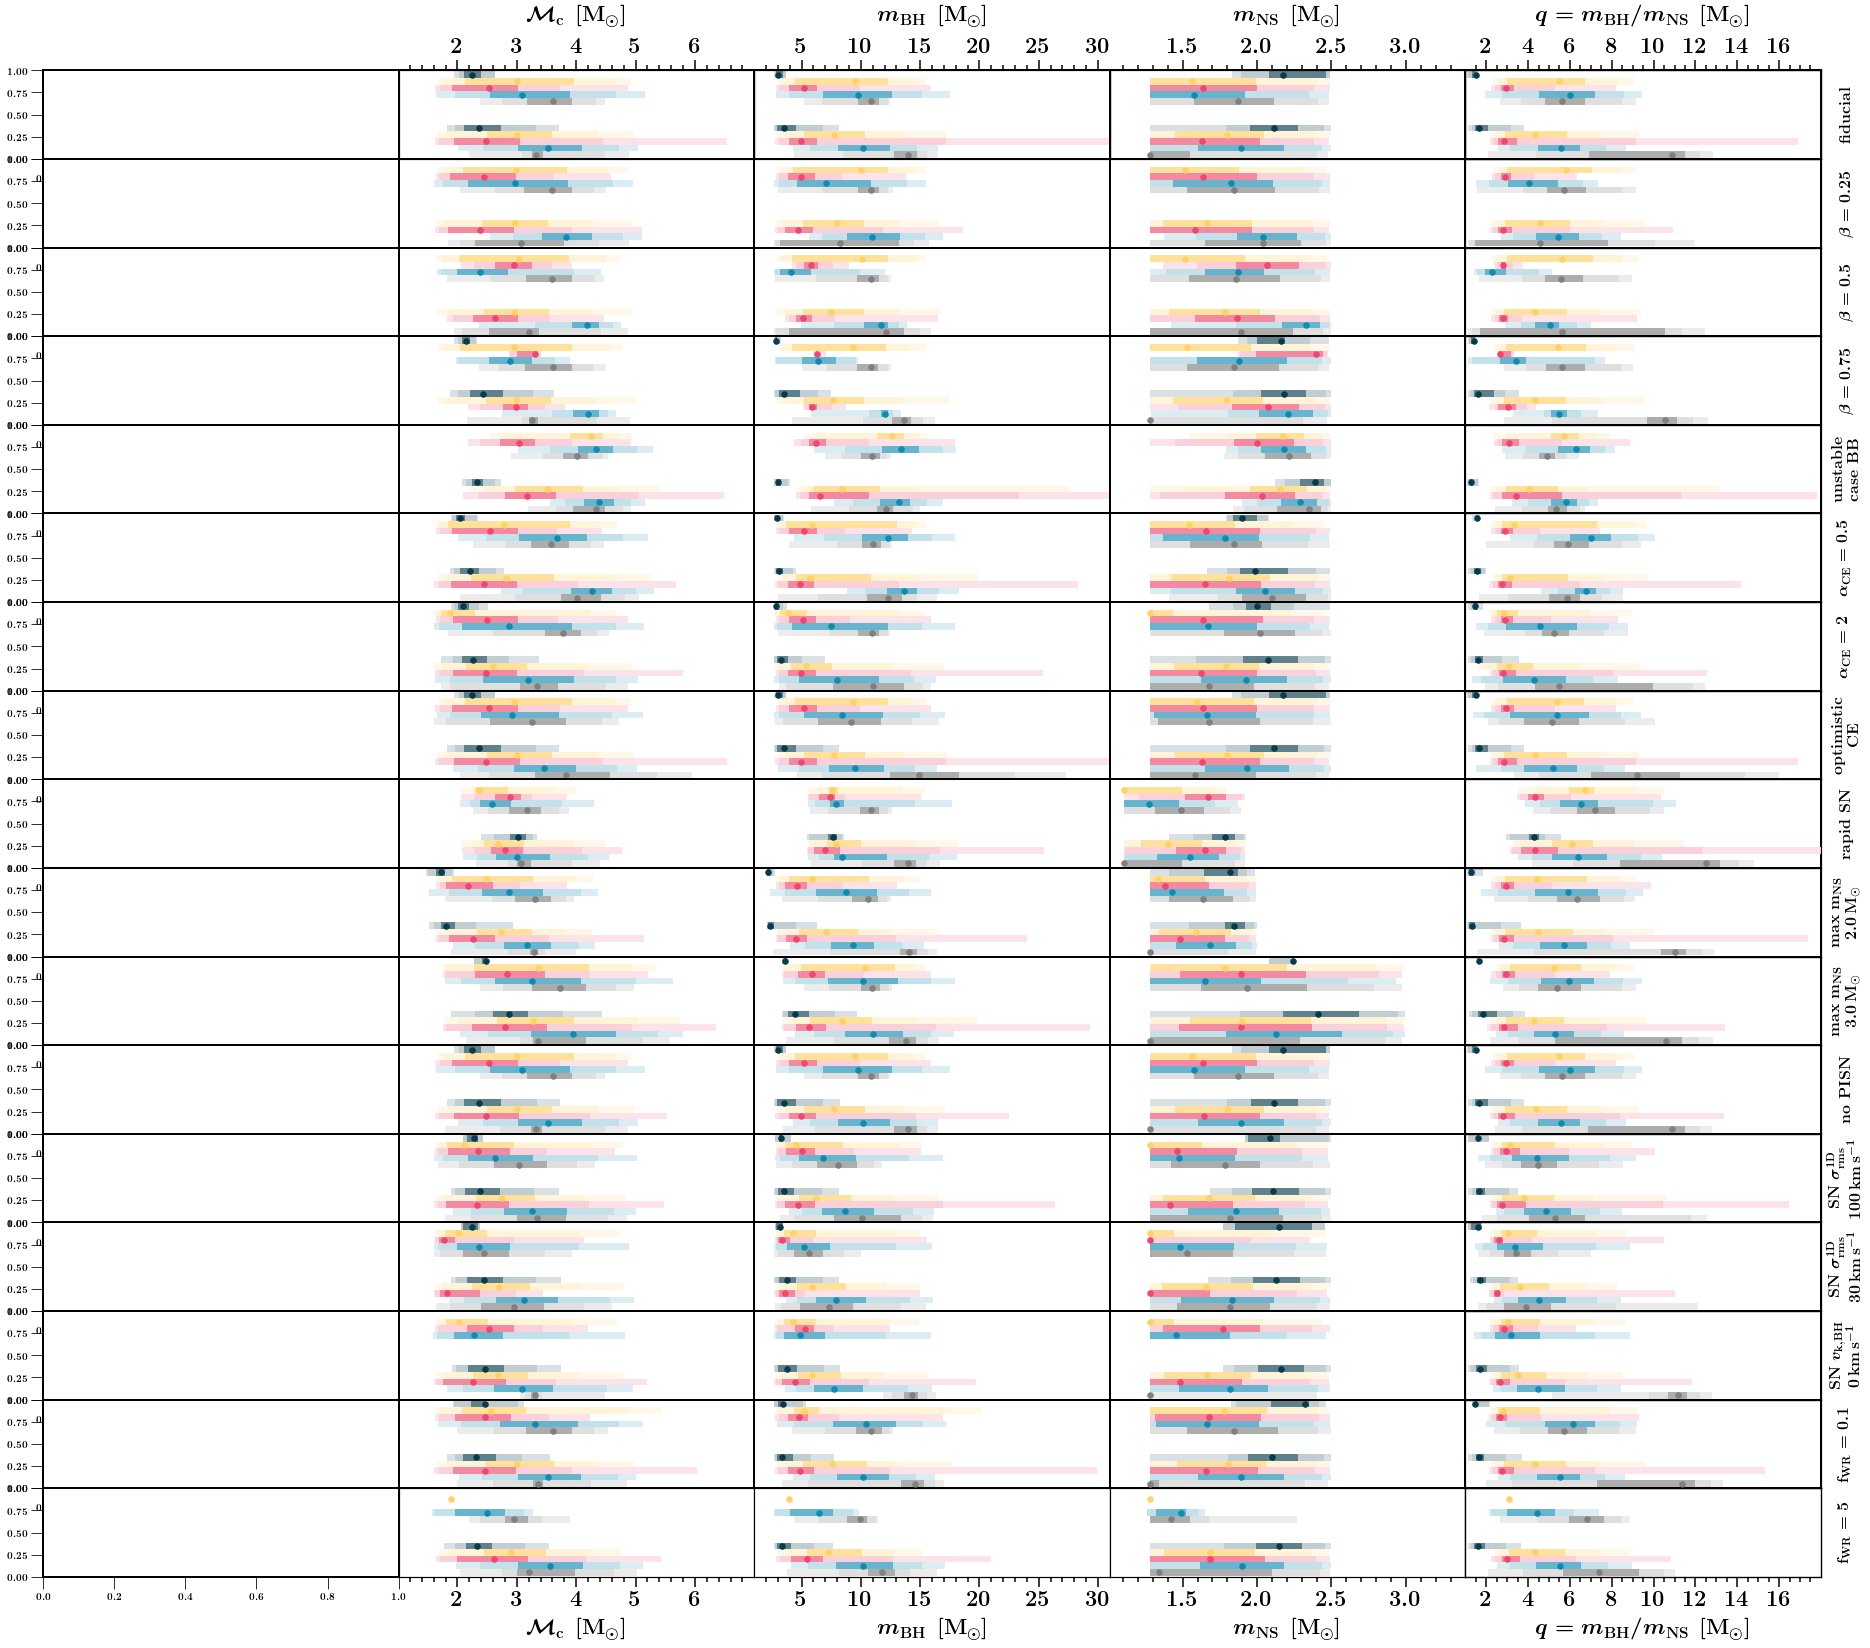

In [43]:
# add location of the COMPAS hdf5 files:
path_dir = '/Volumes/Andromeda/DATA/AllDCO_bugfix/'





ncols, nrows= 5,20
f, ax= plt.subplots(ncols=ncols,nrows=nrows,figsize=(26,23), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})





TYPE = 'BHNS'
DCOtype='BHNS'
# # I do NOT want model E 
# if 'E' in BPSnameslist:
#     BPSnameslist.remove('E')
# print(BPSnameslist)


# GLOBAL SETTINGS 
nModels=17  # number of BPS models we are comparing
BPSnameslist = list(string.ascii_uppercase)[0:nModels] # the label letters for these models
fs_t = 22


## FIRST COLUMN WITH CHIRP MASS ###
xparam, axe_ind, xlabelname ='ChirpMass', 1 , r' $\mathcal{M}_{\rm{c}}$ $ \,  [\rm{M}_{\odot}]$'

plotPercentiles(ax=ax, axe_ind=axe_ind, xparam=xparam, BPSnameslist=BPSnameslist,  DCOtype=DCOtype, path_dir=path_dir)

xlim, ylim=[1.01,6.999], [-0.5, 0.5]
# ticks and so on 
make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=ylim, nameX=xlabelname, nameY=None, logY=False, logX=False)
# bottom label 
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t)
# top label 
ax2x = ax[0,axe_ind].twiny()
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)





## FIRST COLUMN WITH BH MASS ###
xparam, axe_ind, xlabelname ='Mass1', 2,  r' ${m}_{\rm{BH}}$ $ \,  [\rm{M}_{\odot}]$'
xlim, ylim = [1.01,30.99999], [-0.5, 0.5]
plotPercentiles(ax=ax, axe_ind=axe_ind, xparam=xparam, BPSnameslist=BPSnameslist,  DCOtype=DCOtype, path_dir=path_dir)

make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=ylim, nameX=xlabelname, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t)

# top label 
ax2x = ax[0,axe_ind].twiny()
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)




## FIRST COLUMN WITH NS MASS ###
xparam, axe_ind, xlabelname ='Mass2',  3, r' ${m}_{\rm{NS}}$ $ \,  [\rm{M}_{\odot}]$'
xlim, ylim = [1.01,3.3999], [-0.5, 0.5]
plotPercentiles(ax=ax, axe_ind=axe_ind, xparam=xparam, BPSnameslist=BPSnameslist,  DCOtype=DCOtype, path_dir=path_dir)

# bottom label 
make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=ylim, nameX=xlabelname, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t)
# top label 
ax2x = ax[0,axe_ind].twiny()
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)







## COLUMN WITH MASS RATIO ###
xparam, axe_ind, xlabelname ='q', 4 , r' $q = {m}_{\rm{BH}} / {m}_{\rm{NS}}$ $ \,  [\rm{M}_{\odot}]$'
plotPercentiles(ax=ax, axe_ind=axe_ind, xparam=xparam, BPSnameslist=BPSnameslist,  DCOtype=DCOtype, path_dir=path_dir)

xlim, ylim=[1.0,17.99999], [-0.5, 0.5]
make_up_axis(ax, axe_ind, BPSnameslist, xlim, ylim, xlabelname, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t)
# top label 
ax2x = ax[0,axe_ind].twiny()
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)




# add y labels on the right. 
for ind_bps, bps_name in enumerate(BPSnameslist):
    nameY = alphabetPhysicalNameDictWithEnter[bps_name]
    ax2y = ax[ind_bps,axe_ind].twinx()
    
    make_up_axis_single_ax(ax2y, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)
    layoutAxesNoXlabel(ax=ax2y, nameX=None, nameY=nameY, labelpad=25, rotation=90, fontsize=16)




##  SAVE FIG  ###
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)  
plt.savefig('./distributionsplot_masses_formation_channels' + '_'  + DCOtype+ '_new.png', transparent=False)
plt.show()
plt.close()





# NSNS 

finished
finished
finished
finished


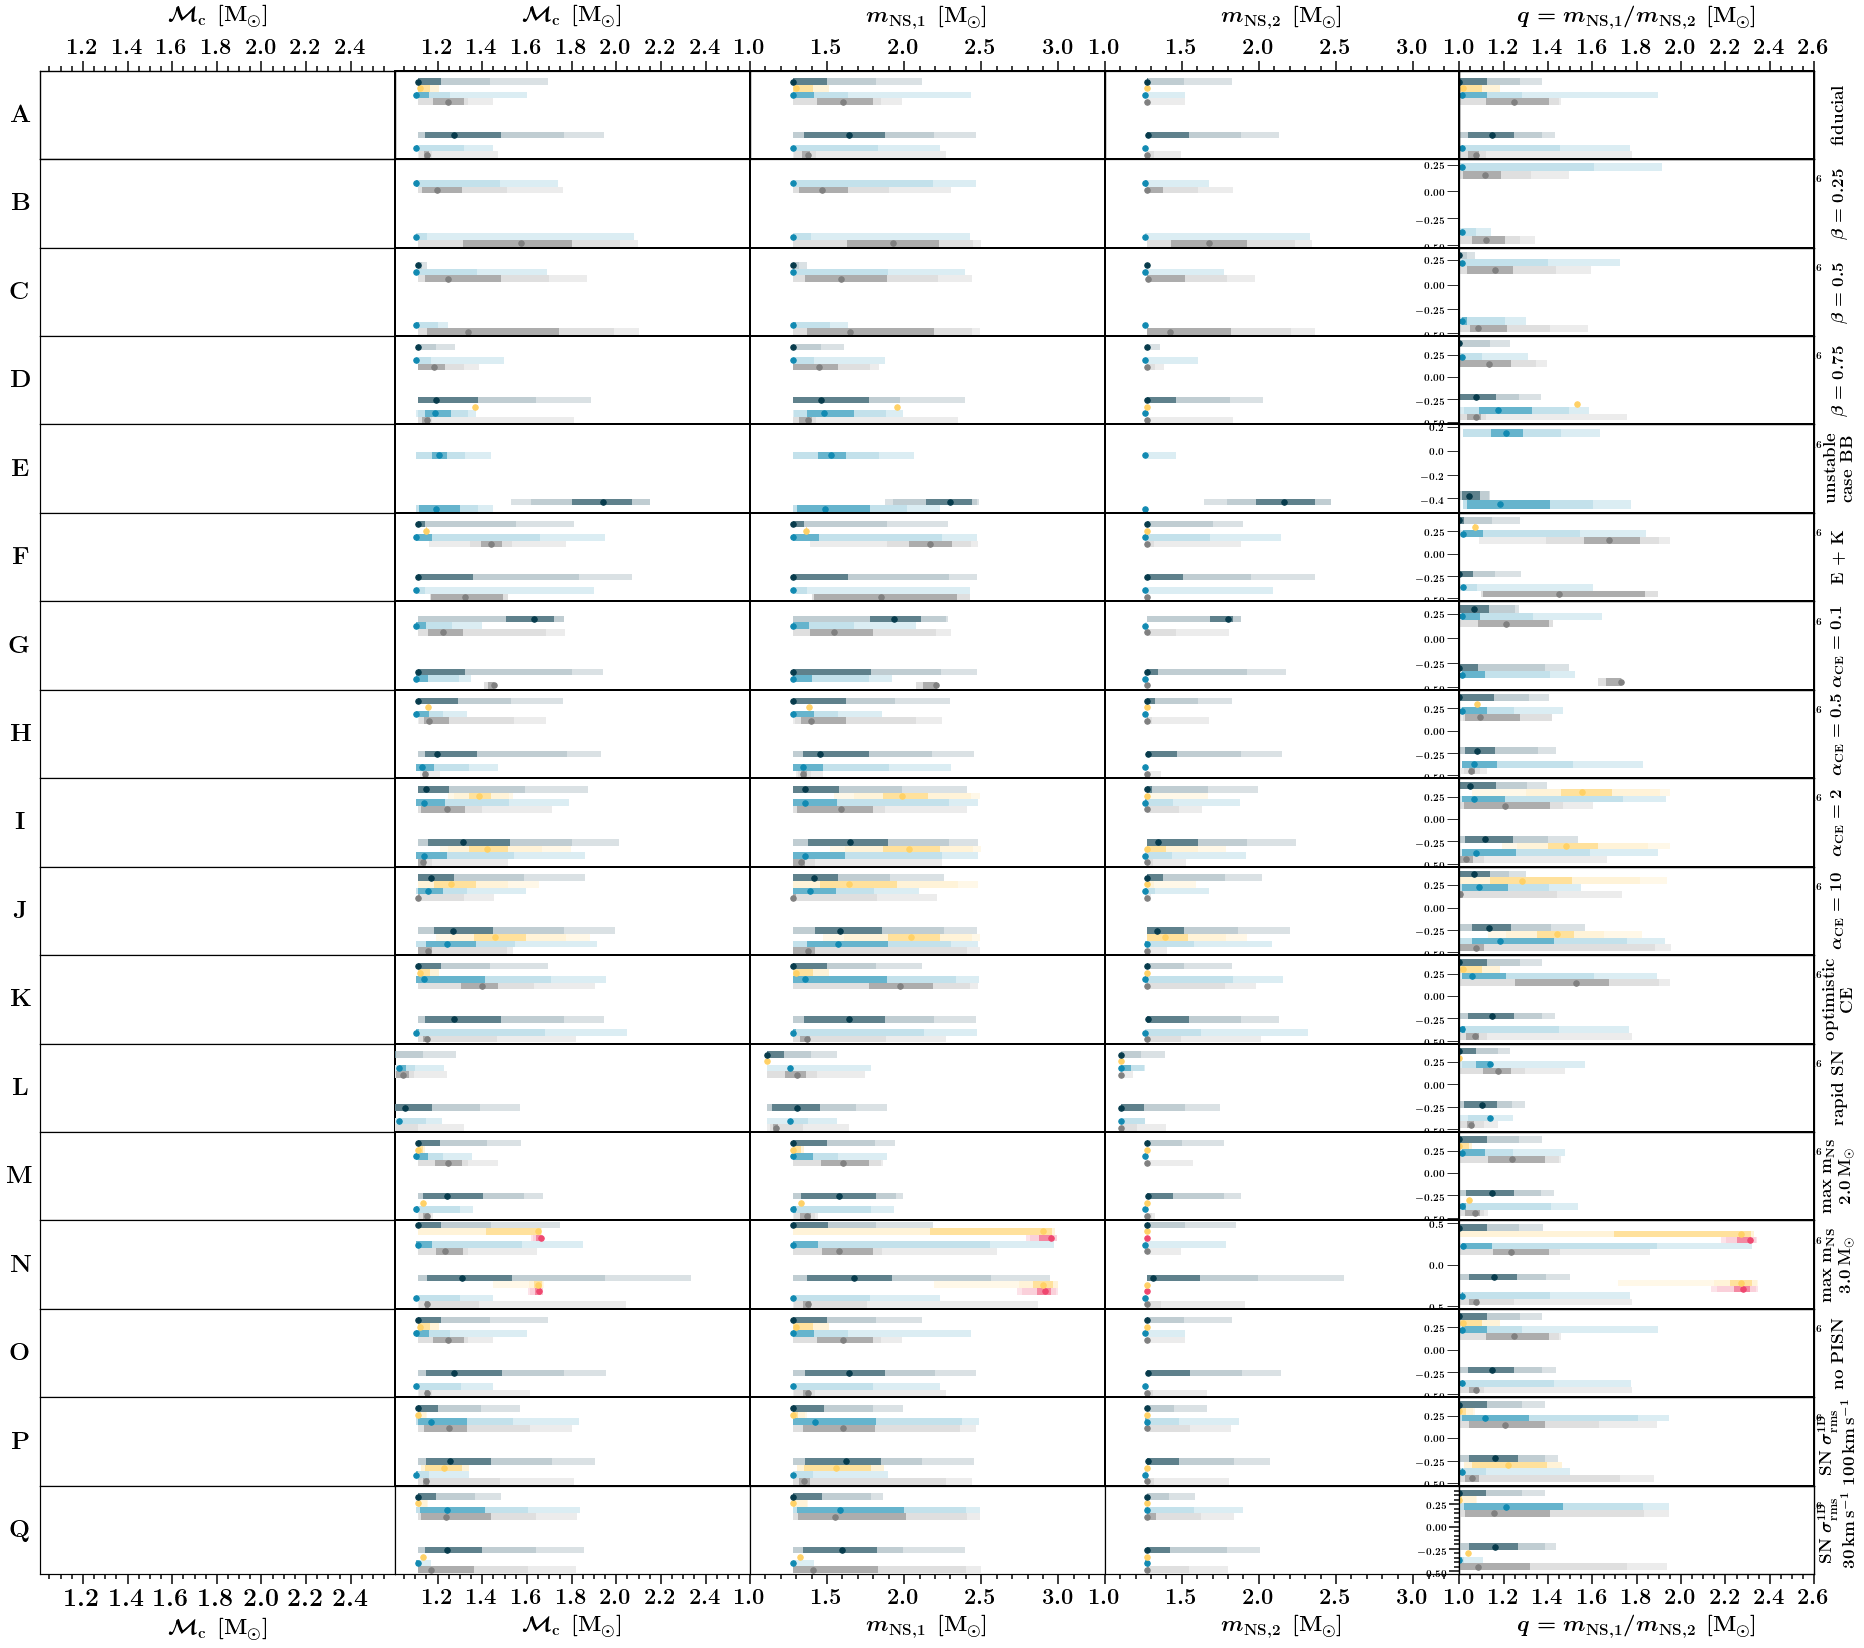

In [4]:

# add location of the COMPAS hdf5 files:
path_dir = '/Volumes/Andromeda/DATA/AllDCO_bugfix/'

ncols, nrows= 5,20
f, ax= plt.subplots(ncols=ncols,nrows=nrows,figsize=(26,23), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})


TYPE = 'BNS'
DCOtype='BNS'
# # I do NOT want model E 
# if 'E' in BPSnameslist:
#     BPSnameslist.remove('E')
# print(BPSnameslist)


# GLOBAL SETTINGS 
nModels=17  # number of BPS models we are comparing
BPSnameslist = list(string.ascii_uppercase)[0:nModels] # the label letters for these models
# whichWeight='det' # which weighting we want (intrinisic or detecter)
# path to the file with the distribution quantiles / percentiles: 
# pathQuantiles='/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_4_5_6/'

fs_t = 22



# FIRST COLUMN WITH CHIRP MASS ###
xparam, axe_ind, xlabelname ='ChirpMass', 0,  r' $\mathcal{M}_{\rm{c}}$ $ \,  [\rm{M}_{\odot}]$' 
# plot percentiles:
# plot_kdes(axe=ax, axe_ind=axe_ind, xparam=xparam, BPSmodelNames=BPSnameslist, MSSFRmodelNames=MSSFRnameslist, DCOtype=DCOtype, xvarrange=[1, 2.5], \
#                               whichWeight=whichWeight, path_dir=path_dir)
xlim=[1.01,2.599]
make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=None , nameX=xlabelname, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t)
# top label
ylim=None
ax2x = ax[0,axe_ind].twiny()
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)

# add y labels on the left. 
for ind_bps, bps_name in enumerate(BPSnameslist):
    nameY = r'\textbf{%s}'%bps_name
    layoutAxesNoXlabel(ax=ax[ind_bps,axe_ind], nameX=None, nameY=nameY, labelpad=20, rotation=0)


    
##############################################################
## SECOND COLUMN WITH CHIRP MASS ###
xparam, axe_ind, xlabelname ='ChirpMass', 1 , r' $\mathcal{M}_{\rm{c}}$ $ \,  [\rm{M}_{\odot}]$' 
plotPercentiles(ax=ax, axe_ind=axe_ind, xparam=xparam, BPSnameslist=BPSnameslist,  DCOtype=DCOtype, path_dir=path_dir)
xlim, ylim=[1.01,2.599], [-0.5, 0.5]
# ticks and so on 
make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=ylim, nameX=xlabelname, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t) # bottom label
ax2x = ax[0,axe_ind].twiny() # top label 
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)# top label 
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)# top label 


##############################################################
## THIRD COLUMN WITH MASS 1 ###
xparam, axe_ind, xlabelname ='Mass1', 2,  r' ${m}_{\rm{NS,1}}$ $ \,  [\rm{M}_{\odot}]$'
xlim, ylim = [1.0,3.2999], [-0.5, 0.5]
plotPercentiles(ax=ax, axe_ind=axe_ind, xparam=xparam, BPSnameslist=BPSnameslist,  DCOtype=DCOtype, path_dir=path_dir)
make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=ylim, nameX=xlabelname, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t)
ax2x = ax[0,axe_ind].twiny()  # top label 
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)  # top label 
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)  # top label 


##############################################################
## FOURTH COLUMN WITH MASS 2 ###
xparam, axe_ind, xlabelname ='Mass2',  3, r' ${m}_{\rm{NS,2}}$ $ \,  [\rm{M}_{\odot}]$'
xlim, ylim = [1.0,3.2999], [-0.5, 0.5]
plotPercentiles(ax=ax, axe_ind=axe_ind, xparam=xparam, BPSnameslist=BPSnameslist,  DCOtype=DCOtype, path_dir=path_dir)
make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=ylim, nameX=xlabelname, nameY=None, logY=False, logX=False)  # ticks
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t) # bottom label 

ax2x = ax[0,axe_ind].twiny()# top label 
make_up_axis_single_ax(ax2x, bps_name, BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False) # top label 
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t) # top label 




##############################################################
## COLUMN WITH MASS RATIO ###
xparam, axe_ind, xlabelname ='q', 4 , r' $q = {m}_{\rm{NS,1}} / {m}_{\rm{NS,2}}$ $ \,  [\rm{M}_{\odot}]$'

plotPercentiles(ax=ax, axe_ind=axe_ind, xparam=xparam, BPSnameslist=BPSnameslist,  DCOtype=DCOtype, path_dir=path_dir)
xlim, ylim=[1.0,2.6], [-0.5, 0.5]
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t)
# top label 
ax2x = ax[0,axe_ind].twiny()
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)



# add y labels on the right. 
for ind_bps, bps_name in enumerate(BPSnameslist):
    nameY = alphabetPhysicalNameDictWithEnter[bps_name]
    ax2y = ax[ind_bps,axe_ind].twinx()
    
    make_up_axis_single_ax(ax2y, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)
    layoutAxesNoXlabel(ax=ax2y, nameX=None, nameY=nameY, labelpad=25, rotation=90, fontsize=17)


##  SAVE FIG  ###
plt.tight_layout()
plt.subplots_adjust(wspace=0.0, hspace=0)  
plt.savefig('./distributionsplot_masses_formation_channels_'  + DCOtype+ '_new.png', transparent=False)
plt.show()
plt.close()






# BHBH

finished
finished
finished


KeyboardInterrupt: 

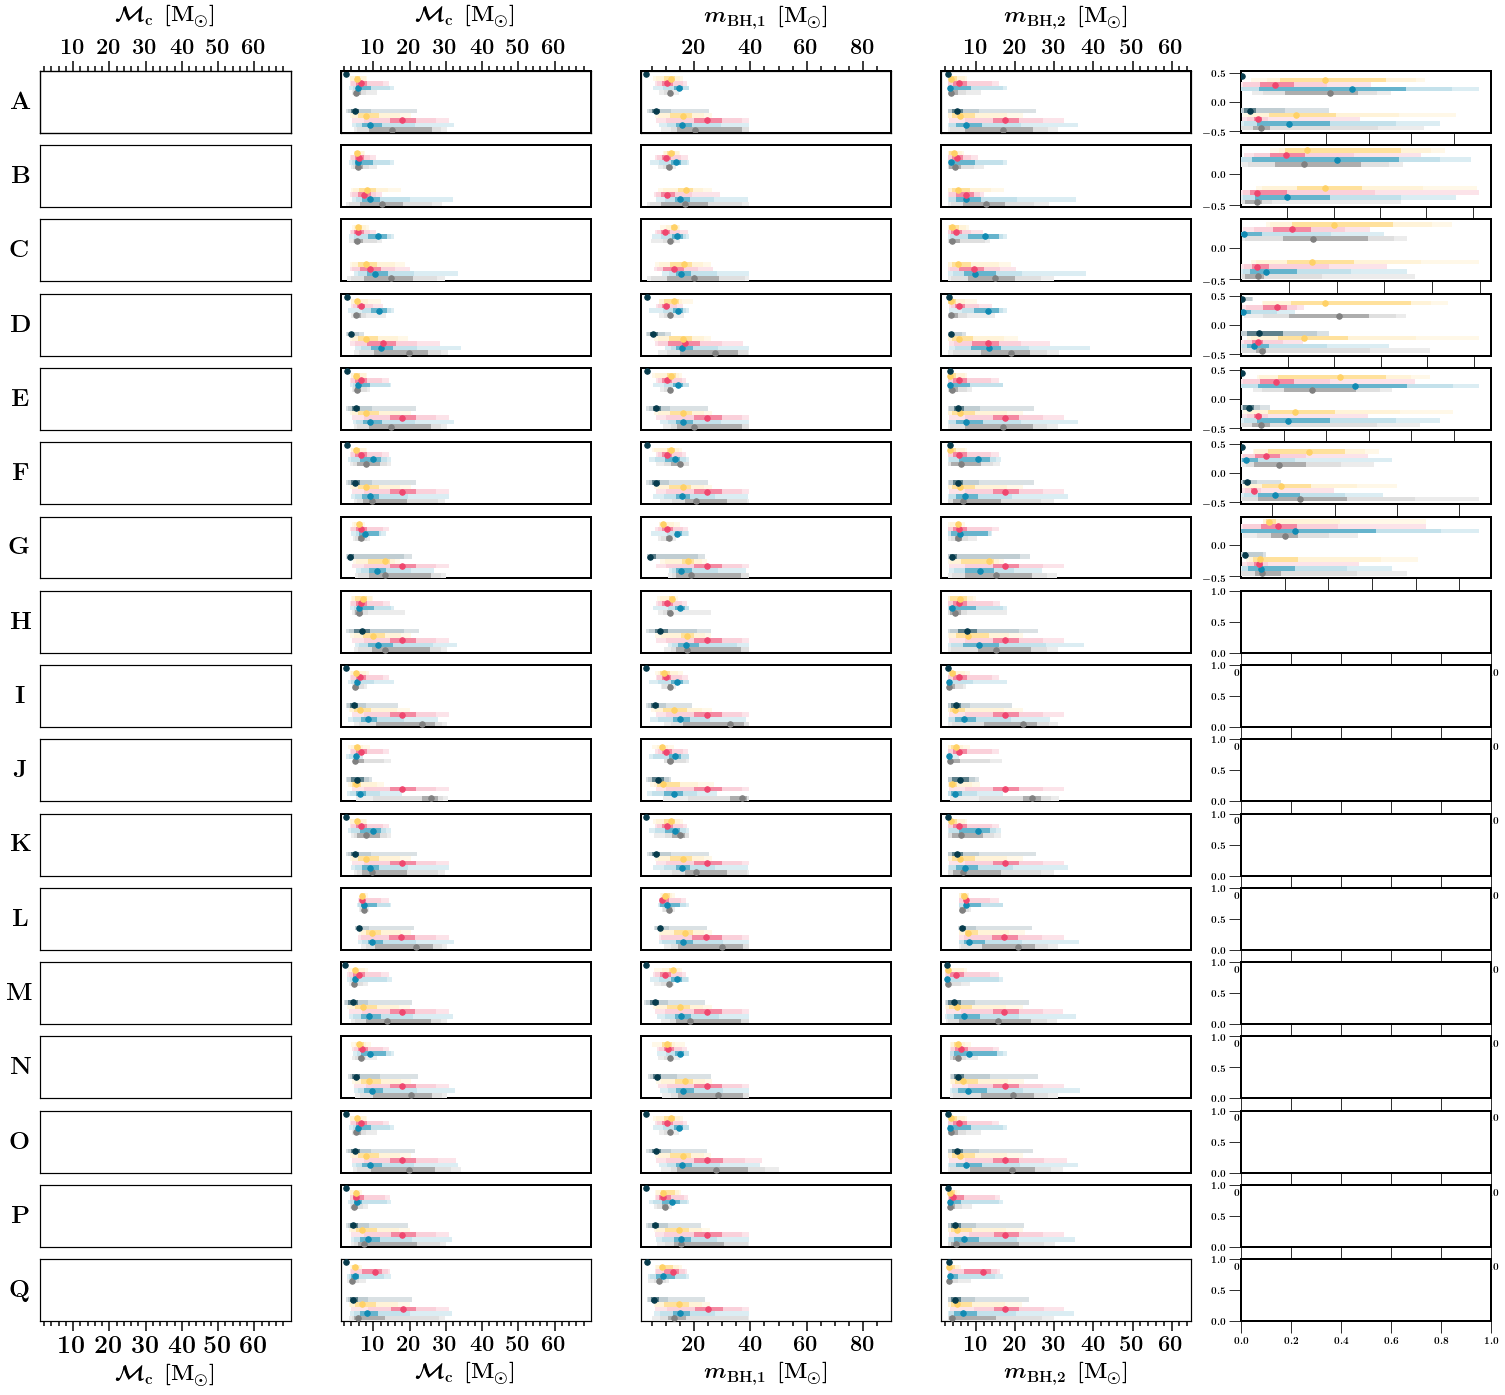

In [5]:

# add location of the COMPAS hdf5 files:
path_dir = '/Volumes/Andromeda/DATA/AllDCO_bugfix/'

ncols, nrows= 5,20
f, ax= plt.subplots(ncols=ncols,nrows=nrows,figsize=(26,23), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})


TYPE = 'BBH'
DCOtype='BBH'
# # I do NOT want model E 
# if 'E' in BPSnameslist:
#     BPSnameslist.remove('E')
# print(BPSnameslist)


# GLOBAL SETTINGS 
nModels=17  # number of BPS models we are comparing
BPSnameslist = list(string.ascii_uppercase)[0:nModels] # the label letters for these models
whichWeight='det' # which weighting we want (intrinisic or detecter)
# path to the file with the distribution quantiles / percentiles: 
pathQuantiles='/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_4_5_6/'

fs_t = 22



# FIRST COLUMN WITH CHIRP MASS ###
xparam, axe_ind, xlabelname ='ChirpMass', 0,  r' $\mathcal{M}_{\rm{c}}$ $ \,  [\rm{M}_{\odot}]$' 
# plot percentiles:
# plotPercentiles(ax=ax, axe_ind=axe_ind, xparam=xparam, BPSnameslist=BPSnameslist,  DCOtype=DCOtype, path_dir=path_dir)
xlim=[1.01,69.99]
make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=None , nameX=xlabelname, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t)
# top label
ylim=None
ax2x = ax[0,axe_ind].twiny()
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)

# add y labels on the left. 
for ind_bps, bps_name in enumerate(BPSnameslist):
    nameY = r'\textbf{%s}'%bps_name
    layoutAxesNoXlabel(ax=ax[ind_bps,axe_ind], nameX=None, nameY=nameY, labelpad=20, rotation=0)


    
##############################################################
## SECOND COLUMN WITH CHIRP MASS ###
xparam, axe_ind, xlabelname ='ChirpMass', 1 , r' $\mathcal{M}_{\rm{c}}$ $ \,  [\rm{M}_{\odot}]$' 
plotPercentiles(ax=ax, axe_ind=axe_ind, xparam=xparam, BPSnameslist=BPSnameslist,  DCOtype=DCOtype, path_dir=path_dir)
xlim, ylim=[1.01,69.99], [-0.5, 0.5]
# ticks and so on 
make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=ylim, nameX=xlabelname, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t) # bottom label
ax2x = ax[0,axe_ind].twiny() # top label 
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)# top label 
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)# top label 


##############################################################
## THIRD COLUMN WITH MASS 1 ###
xparam, axe_ind, xlabelname ='Mass1', 2,  r' ${m}_{\rm{BH,1}}$ $ \,  [\rm{M}_{\odot}]$'
xlim, ylim = [1.0,89.99], [-0.5, 0.5]
plotPercentiles(ax=ax, axe_ind=axe_ind, xparam=xparam, BPSnameslist=BPSnameslist,  DCOtype=DCOtype, path_dir=path_dir)
make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=ylim, nameX=xlabelname, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t)
ax2x = ax[0,axe_ind].twiny()  # top label 
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)  # top label 
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)  # top label 


##############################################################
## FOURTH COLUMN WITH MASS 2 ###
xparam, axe_ind, xlabelname ='Mass2',  3, r' ${m}_{\rm{BH,2}}$ $ \,  [\rm{M}_{\odot}]$'
xlim, ylim = [1.0,64.99], [-0.5, 0.5]
plotPercentiles(ax=ax, axe_ind=axe_ind, xparam=xparam, BPSnameslist=BPSnameslist,  DCOtype=DCOtype, path_dir=path_dir)
make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=ylim, nameX=xlabelname, nameY=None, logY=False, logX=False)  # ticks
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t) # bottom label 

ax2x = ax[0,axe_ind].twiny()# top label 
make_up_axis_single_ax(ax2x, bps_name, BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False) # top label 
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t) # top label 




##############################################################
## COLUMN WITH MASS RATIO ###
xparam, axe_ind, xlabelname ='q', 4 , r' $q = {m}_{\rm{BH,1}} / {m}_{\rm{BH,2}}$ $ \,  [\rm{M}_{\odot}]$'
plotPercentiles(ax=ax, axe_ind=axe_ind, xparam=xparam, BPSnameslist=BPSnameslist,  DCOtype=DCOtype, path_dir=path_dir)
xlim, ylim=[1.0,6.7], [-0.5, 0.5]
make_up_axis(ax, axe_ind, BPSnameslist, xlim, ylim, xlabelname, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t)
# top label 
ax2x = ax[0,axe_ind].twiny()
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)



# add y labels on the right. 
for ind_bps, bps_name in enumerate(BPSnameslist):
    nameY = alphabetPhysicalNameDictWithEnter[bps_name]
    ax2y = ax[ind_bps,axe_ind].twinx()
    
    make_up_axis_single_ax(ax2y, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)
    layoutAxesNoXlabel(ax=ax2y, nameX=None, nameY=nameY, labelpad=25, rotation=90, fontsize=17)


##  SAVE FIG  ###
plt.tight_layout()
plt.subplots_adjust(wspace=0.0, hspace=0)  
plt.savefig('./distributionsplot_masses_formation_channels_'   + DCOtype+ '_new.png', transparent=False)
plt.show()
plt.close()






finished
finished


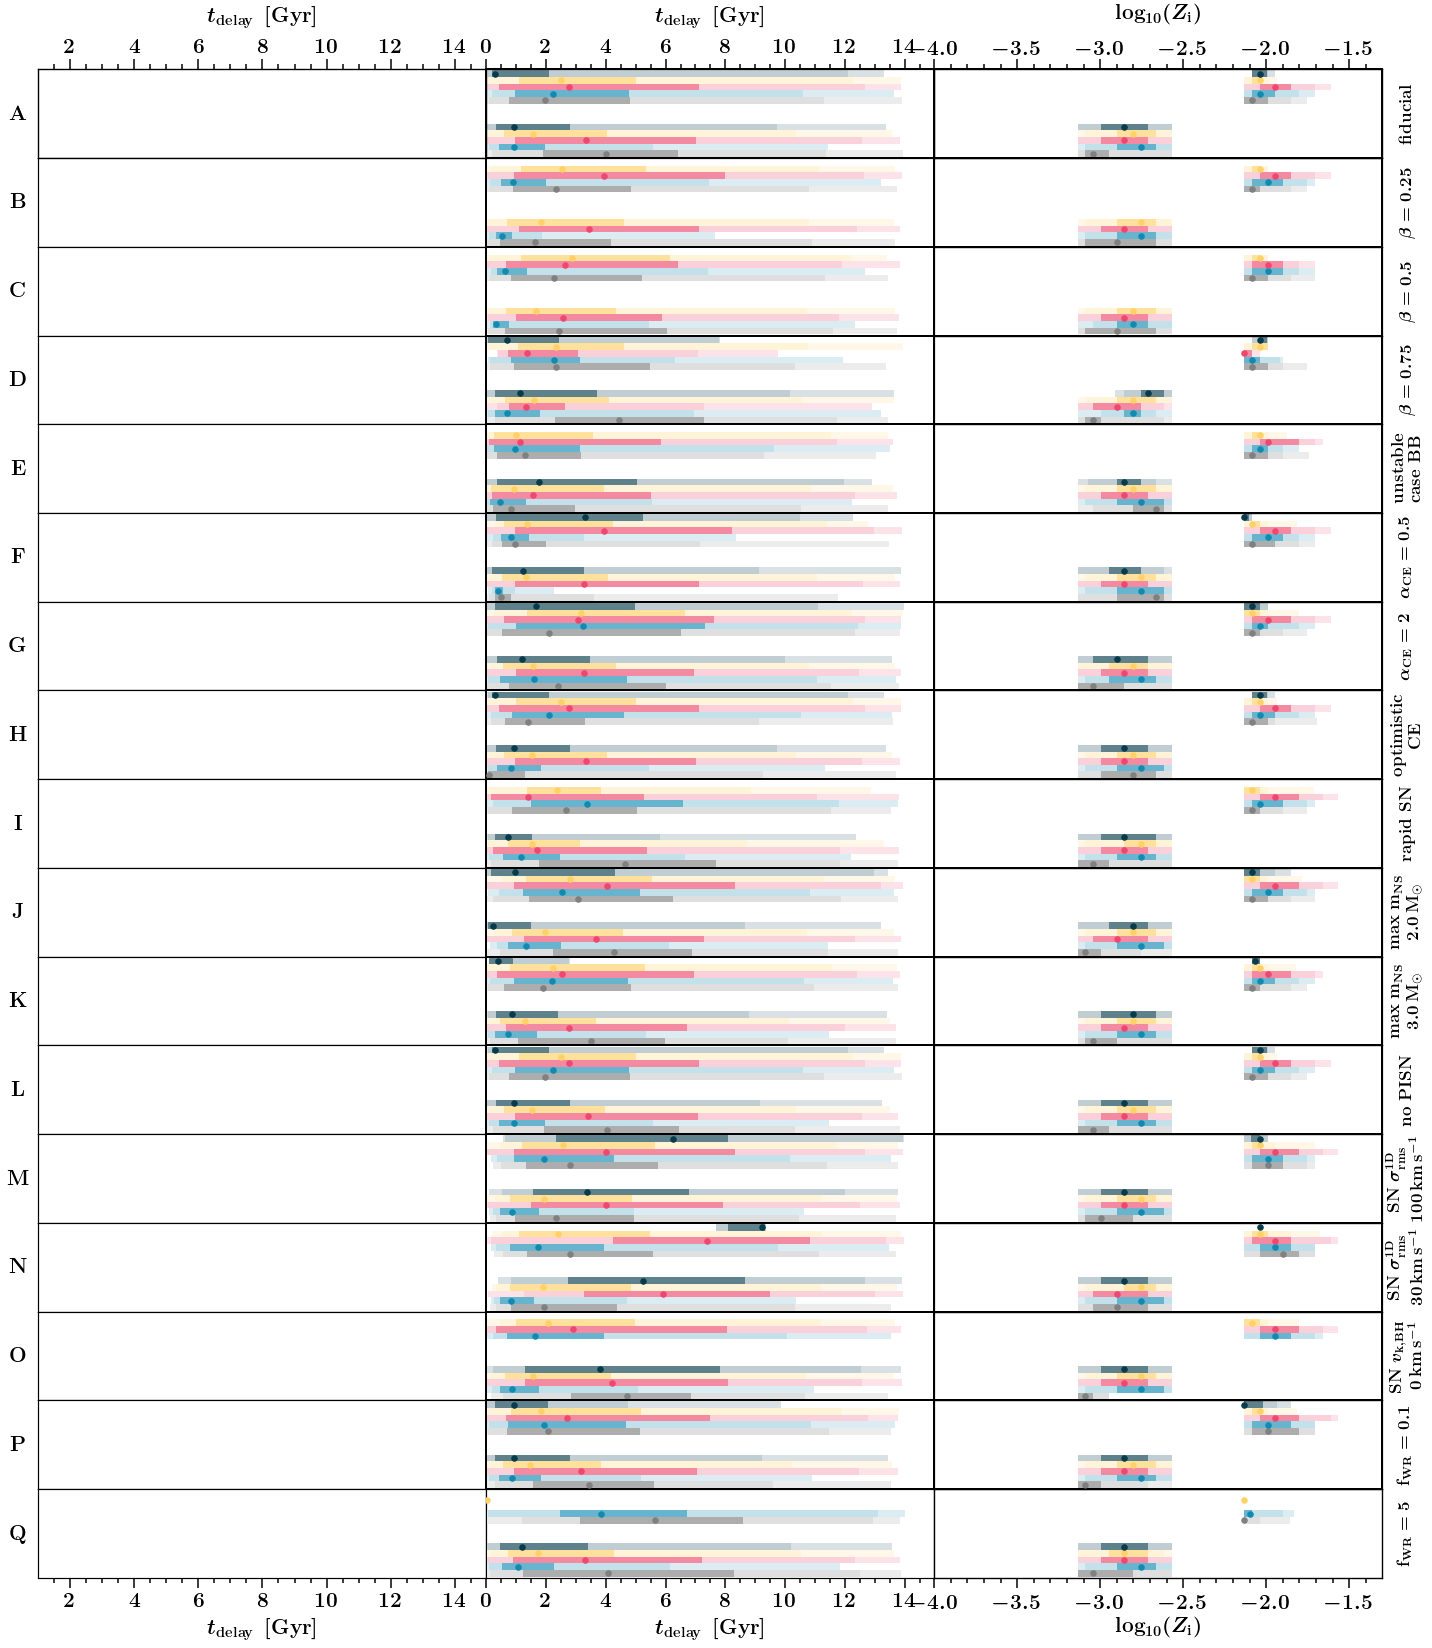

In [49]:

# add location of the COMPAS hdf5 files:
path_dir = '/Volumes/Andromeda/DATA/AllDCO_bugfix/'

ncols, nrows= 3,20
f, ax= plt.subplots(ncols=ncols,nrows=nrows,figsize=(20,23), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})


TYPE = 'BHNS'
DCOtype='BHNS'
# # I do NOT want model E 
# if 'E' in BPSnameslist:
#     BPSnameslist.remove('E')
# print(BPSnameslist)


# GLOBAL SETTINGS 
nModels=17  # number of BPS models we are comparing
BPSnameslist = list(string.ascii_uppercase)[0:nModels] # the label letters for these models
whichWeight='det' # which weighting we want (intrinisic or detecter)
# path to the file with the distribution quantiles / percentiles: 
pathQuantiles='/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_4_5_6/'

fs_t = 21






##############################################################
# FIRST COLUMN WITH KDE  ###
xparam, axe_ind, xlabelname ='tdelay', 0,  r' $t_{\rm{delay}}$ $ \, [{\rm{Gyr}}]$'
# plot percentiles:
# plot_kdes(axe=ax, axe_ind=axe_ind, xparam=xparam, BPSmodelNames=BPSnameslist, MSSFRmodelNames=MSSFRnameslist, DCOtype=DCOtype, xvarrange=[1, 15], \
#                               whichWeight=whichWeight, path_dir=path_dir)
xlim=[1,14.99]
make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=None , nameX=xlabelname, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t)
# top label
ylim=None
ax2x = ax[0,axe_ind].twiny()
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)

# add y labels on the left. 
for ind_bps, bps_name in enumerate(BPSnameslist):
    nameY = r'\textbf{%s}'%bps_name
    layoutAxesNoXlabel(ax=ax[ind_bps,axe_ind], nameX=None, nameY=nameY, labelpad=20, rotation=0, fontsize=fs_t)


    
##############################################################
## SECOND COLUMN WITH CHIRP MASS ###
xparam, axe_ind, xlabelname ='tdelay', 1,  r' $t_{\rm{delay}}$ $ \, [{\rm{Gyr}}]$'
plotPercentiles(ax=ax, axe_ind=axe_ind, xparam=xparam, BPSnameslist=BPSnameslist,  DCOtype=DCOtype, path_dir=path_dir)
xlim, ylim=[0,14.99], [-0.5, 0.5]
# ticks and so on 
make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=ylim, nameX=xlabelname, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t) # bottom label
ax2x = ax[0,axe_ind].twiny() # top label 
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)# top label 
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)# top label 


##############################################################
## THIRD COLUMN WITH MASS 1 ###
xparam, axe_ind, xlabelname ='log10metallicitySystems', 2, r' $\log_{10}(Z_{\rm{i}})$ $ \, $' 
xlim, ylim = [np.log10(0.0001),  np.log10(0.0499)], [-0.5, 0.5]
plotPercentiles(ax=ax, axe_ind=axe_ind, xparam=xparam, BPSnameslist=BPSnameslist,  DCOtype=DCOtype, path_dir=path_dir)
make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=ylim, nameX=xlabelname, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t)
ax2x = ax[0,axe_ind].twiny()  # top label 
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)  # top label 
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)  # top label 


# add y labels on the right. 
for ind_bps, bps_name in enumerate(BPSnameslist):
    nameY = alphabetPhysicalNameDictWithEnter[bps_name]
    ax2y = ax[ind_bps,axe_ind].twinx()
    
    make_up_axis_single_ax(ax2y, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)
    layoutAxesNoXlabel(ax=ax2y, nameX=None, nameY=nameY, labelpad=25, rotation=90, fontsize=17)
    
    
    
##  SAVE FIG  ###
plt.tight_layout()
plt.subplots_adjust(wspace=0.0, hspace=0)  
plt.savefig('./distributionsplot_masses_formation_channels_'  + DCOtype+ '.png', transparent=False)
plt.show()
plt.close()






finished
finished


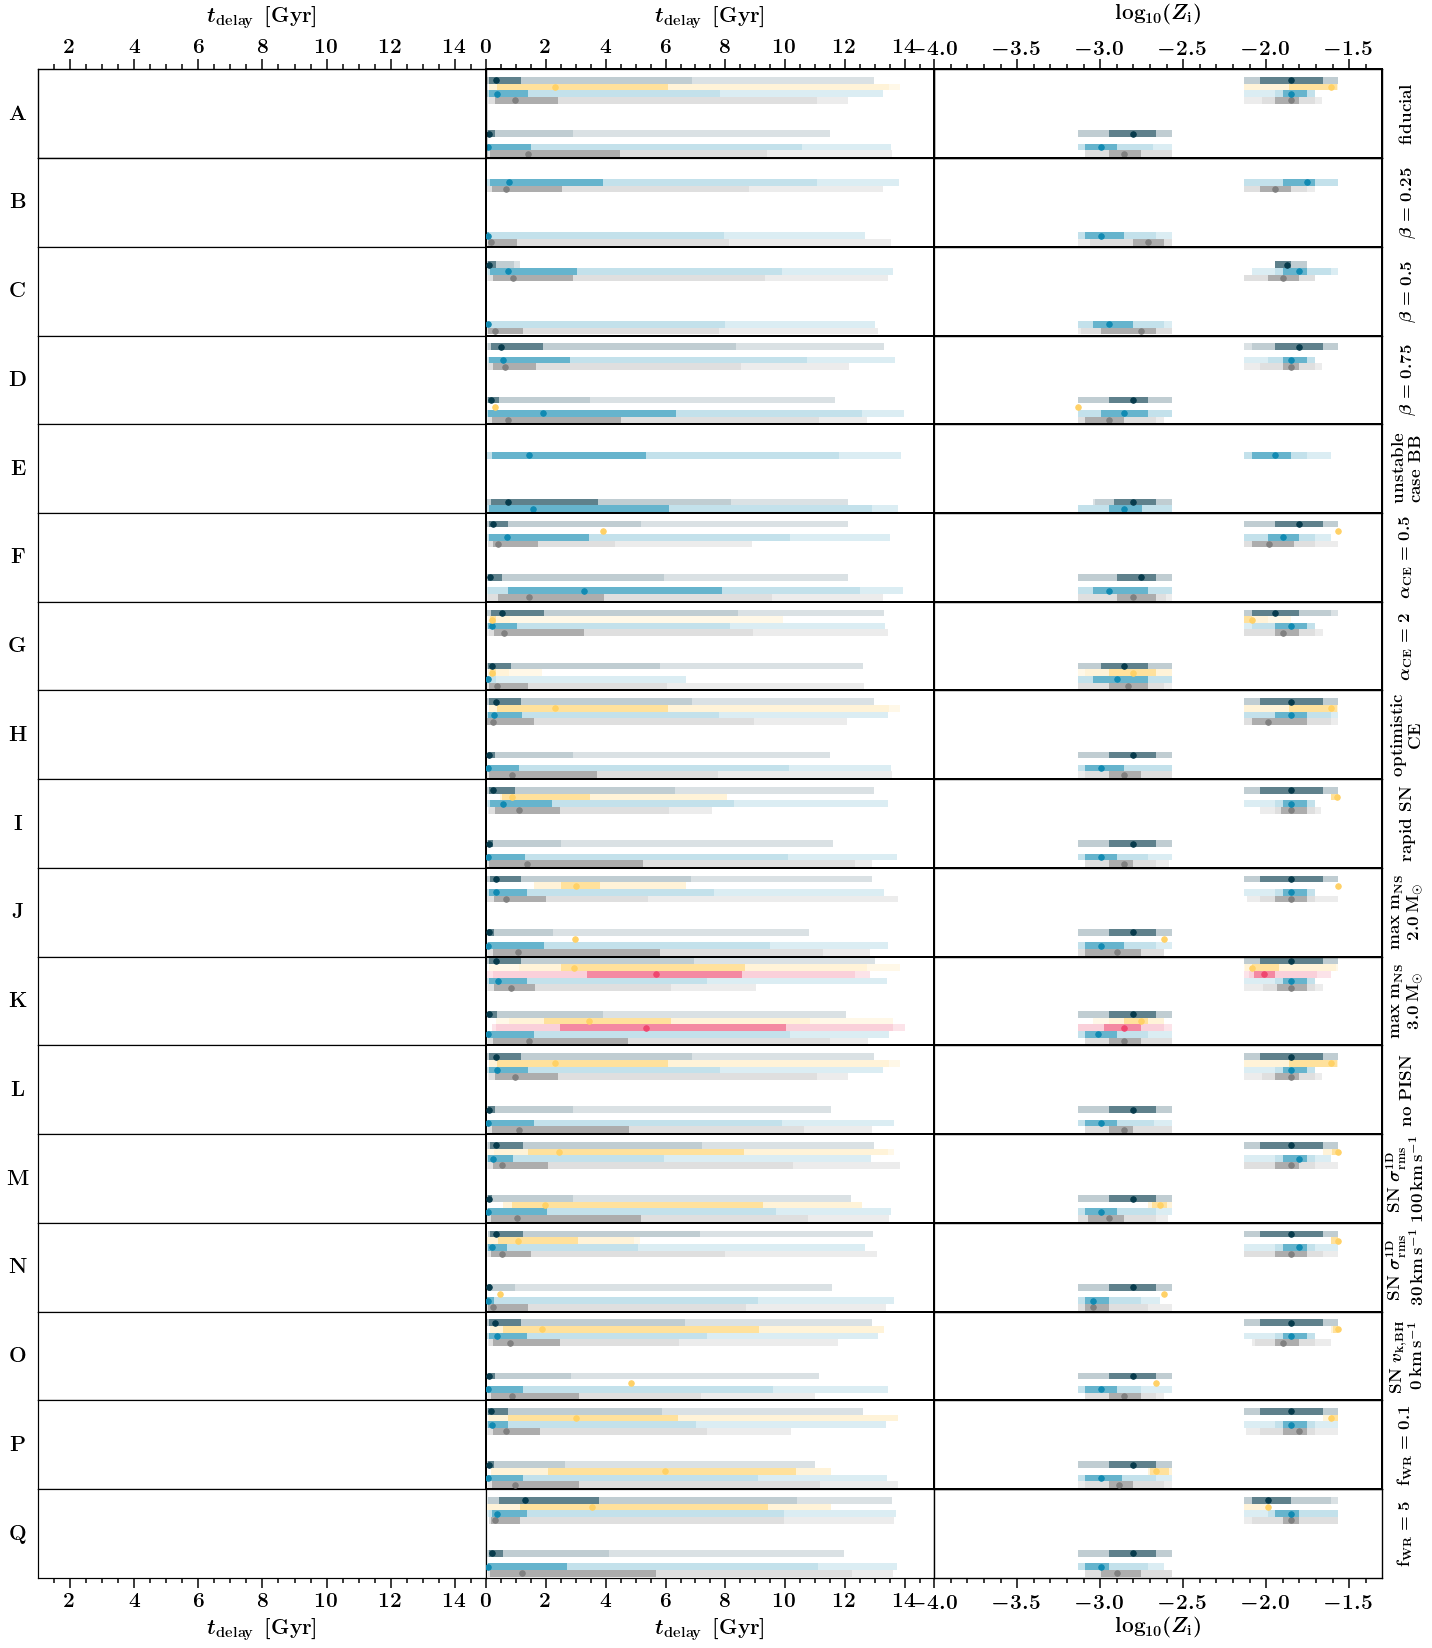

In [50]:

# add location of the COMPAS hdf5 files:
path_dir = '/Volumes/Andromeda/DATA/AllDCO_bugfix/'

ncols, nrows= 3,20
f, ax= plt.subplots(ncols=ncols,nrows=nrows,figsize=(20,23), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})


TYPE = 'BNS'
DCOtype='BNS'
# # I do NOT want model E 
# if 'E' in BPSnameslist:
#     BPSnameslist.remove('E')
# print(BPSnameslist)


# GLOBAL SETTINGS 
nModels=17  # number of BPS models we are comparing
BPSnameslist = list(string.ascii_uppercase)[0:nModels] # the label letters for these models
whichWeight='det' # which weighting we want (intrinisic or detecter)
# path to the file with the distribution quantiles / percentiles: 
pathQuantiles='/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_4_5_6/'

fs_t = 21






##############################################################
# FIRST COLUMN WITH KDE  ###
xparam, axe_ind, xlabelname ='tdelay', 0,  r' $t_{\rm{delay}}$ $ \, [{\rm{Gyr}}]$'
# plot percentiles:
# plot_kdes(axe=ax, axe_ind=axe_ind, xparam=xparam, BPSmodelNames=BPSnameslist, MSSFRmodelNames=MSSFRnameslist, DCOtype=DCOtype, xvarrange=[1, 15], \
#                               whichWeight=whichWeight, path_dir=path_dir)
xlim=[1,14.99]
make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=None , nameX=xlabelname, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t)
# top label
ylim=None
ax2x = ax[0,axe_ind].twiny()
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)

# add y labels on the left. 
for ind_bps, bps_name in enumerate(BPSnameslist):
    nameY = r'\textbf{%s}'%bps_name
    layoutAxesNoXlabel(ax=ax[ind_bps,axe_ind], nameX=None, nameY=nameY, labelpad=20, rotation=0, fontsize=fs_t)


    
##############################################################
## SECOND COLUMN WITH CHIRP MASS ###
xparam, axe_ind, xlabelname ='tdelay', 1,  r' $t_{\rm{delay}}$ $ \, [{\rm{Gyr}}]$'
plotPercentiles(ax=ax, axe_ind=axe_ind, xparam=xparam, BPSnameslist=BPSnameslist,  DCOtype=DCOtype, path_dir=path_dir)
xlim, ylim=[0,14.99], [-0.5, 0.5]
# ticks and so on 
make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=ylim, nameX=xlabelname, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t) # bottom label
ax2x = ax[0,axe_ind].twiny() # top label 
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)# top label 
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)# top label 


##############################################################
## THIRD COLUMN WITH MASS 1 ###
xparam, axe_ind, xlabelname ='log10metallicitySystems', 2, r' $\log_{10}(Z_{\rm{i}})$ $ \, $' 
xlim, ylim = [np.log10(0.0001),  np.log10(0.0499)], [-0.5, 0.5]
plotPercentiles(ax=ax, axe_ind=axe_ind, xparam=xparam, BPSnameslist=BPSnameslist,  DCOtype=DCOtype, path_dir=path_dir)
make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=ylim, nameX=xlabelname, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t)
ax2x = ax[0,axe_ind].twiny()  # top label 
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)  # top label 
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)  # top label 


# add y labels on the right. 
for ind_bps, bps_name in enumerate(BPSnameslist):
    nameY = alphabetPhysicalNameDictWithEnter[bps_name]
    ax2y = ax[ind_bps,axe_ind].twinx()
    
    make_up_axis_single_ax(ax2y, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)
    layoutAxesNoXlabel(ax=ax2y, nameX=None, nameY=nameY, labelpad=25, rotation=90, fontsize=17)
    
    
    
##  SAVE FIG  ###
plt.tight_layout()
plt.subplots_adjust(wspace=0.0, hspace=0)  
plt.savefig('./distributionsplot_masses_formation_channels_'  + DCOtype+ '.png', transparent=False)
plt.show()
plt.close()






finished
finished


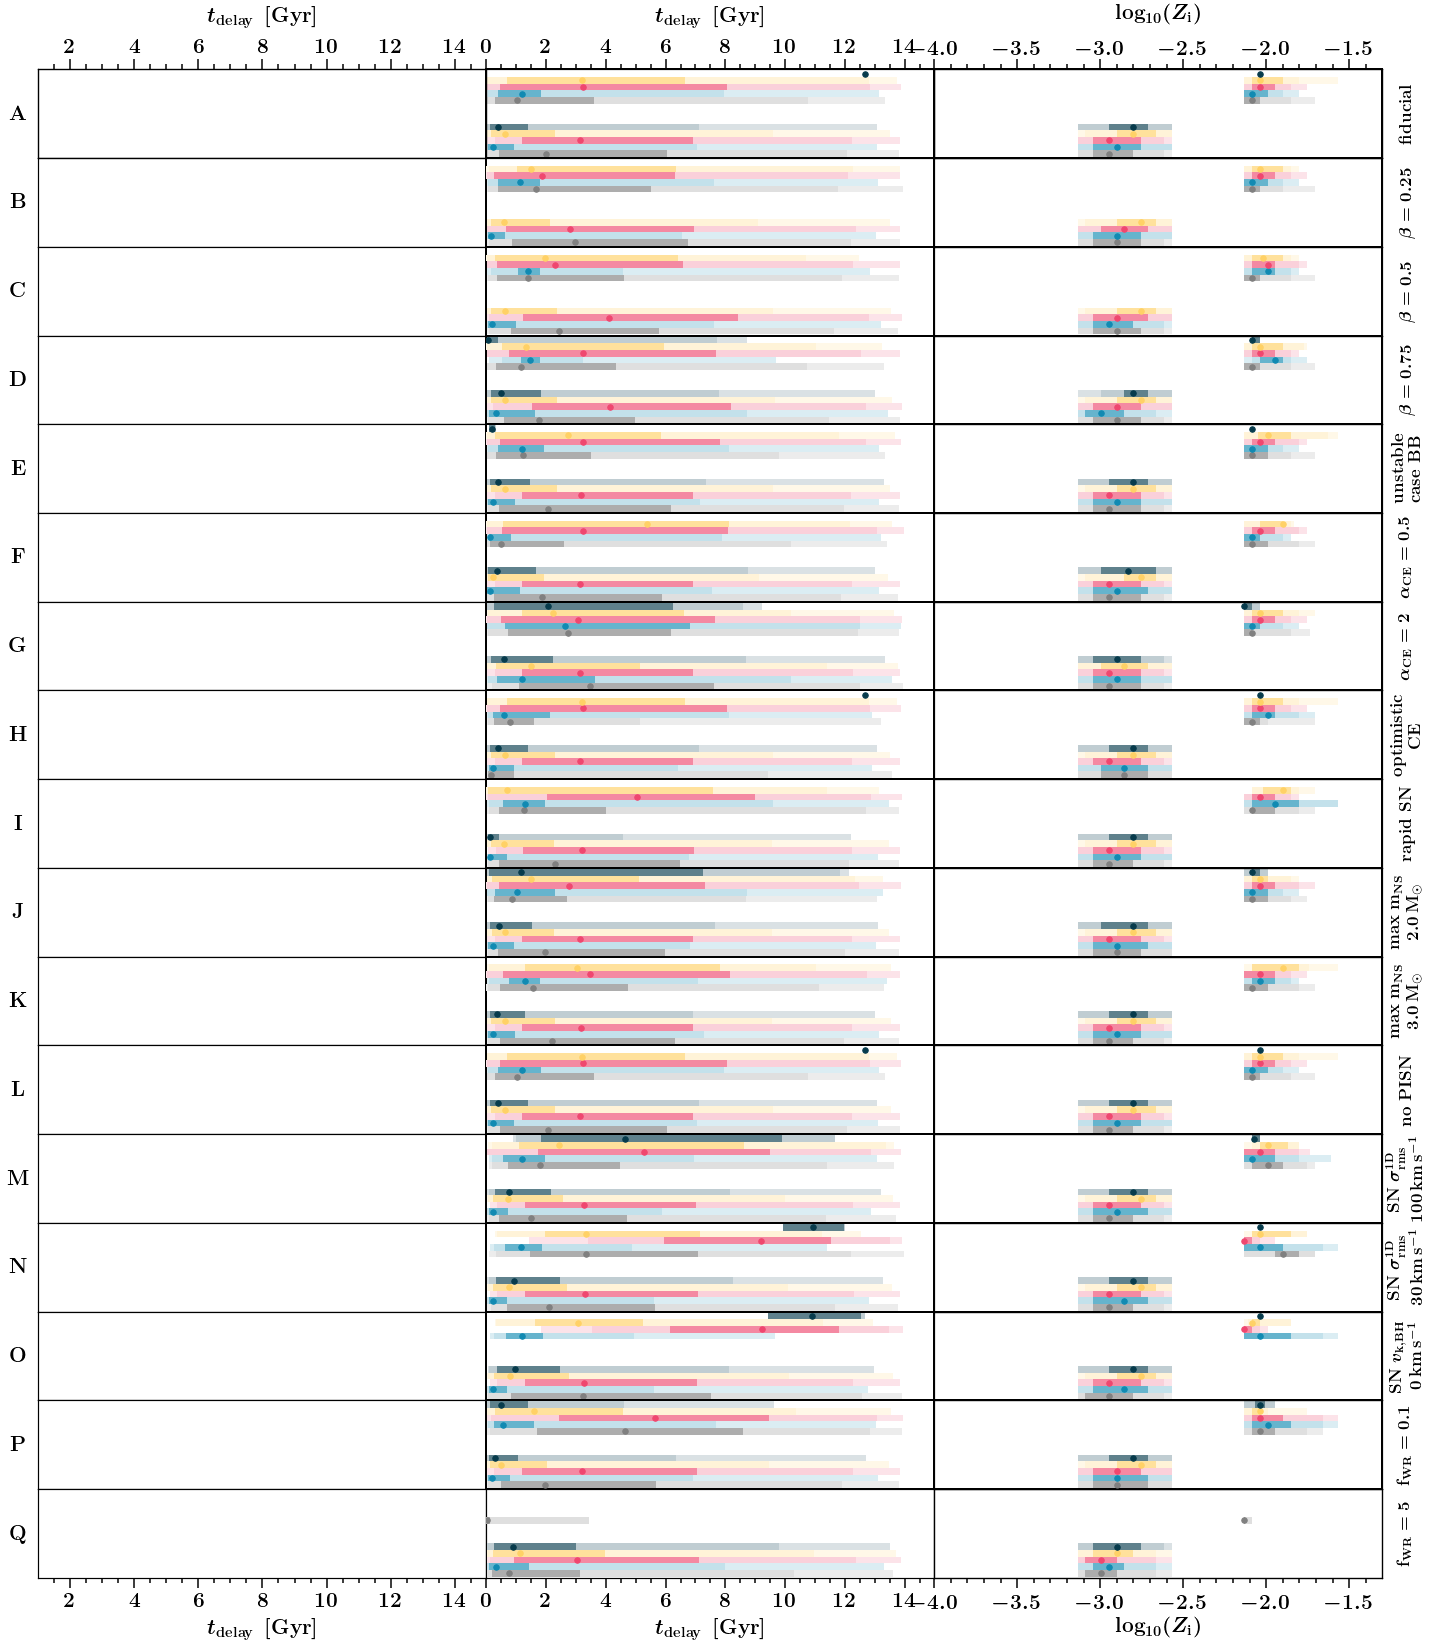

In [51]:

# add location of the COMPAS hdf5 files:
path_dir = '/Volumes/Andromeda/DATA/AllDCO_bugfix/'

ncols, nrows= 3,20
f, ax= plt.subplots(ncols=ncols,nrows=nrows,figsize=(20,23), 
              gridspec_kw={"width_ratios":1.5*np.ones(ncols), "height_ratios":1*np.ones(nrows)})


TYPE = 'BBH'
DCOtype='BBH'
# # I do NOT want model E 
# if 'E' in BPSnameslist:
#     BPSnameslist.remove('E')
# print(BPSnameslist)


# GLOBAL SETTINGS 
nModels=17  # number of BPS models we are comparing
BPSnameslist = list(string.ascii_uppercase)[0:nModels] # the label letters for these models
whichWeight='det' # which weighting we want (intrinisic or detecter)
# path to the file with the distribution quantiles / percentiles: 
pathQuantiles='/Users/floorbroekgaarden/Projects/GitHub/Double-Compact-Object-Mergers/dataFiles/summary_data_Fig_4_5_6/'

fs_t = 21






##############################################################
# FIRST COLUMN WITH KDE  ###
xparam, axe_ind, xlabelname ='tdelay', 0,  r' $t_{\rm{delay}}$ $ \, [{\rm{Gyr}}]$'
# plot percentiles:
# plot_kdes(axe=ax, axe_ind=axe_ind, xparam=xparam, BPSmodelNames=BPSnameslist, MSSFRmodelNames=MSSFRnameslist, DCOtype=DCOtype, xvarrange=[1, 15], \
#                               whichWeight=whichWeight, path_dir=path_dir)
xlim=[1,14.99]
make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=None , nameX=xlabelname, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t)
# top label
ylim=None
ax2x = ax[0,axe_ind].twiny()
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)

# add y labels on the left. 
for ind_bps, bps_name in enumerate(BPSnameslist):
    nameY = r'\textbf{%s}'%bps_name
    layoutAxesNoXlabel(ax=ax[ind_bps,axe_ind], nameX=None, nameY=nameY, labelpad=20, rotation=0, fontsize=fs_t)


    
##############################################################
## SECOND COLUMN WITH CHIRP MASS ###
xparam, axe_ind, xlabelname ='tdelay', 1,  r' $t_{\rm{delay}}$ $ \, [{\rm{Gyr}}]$'
plotPercentiles(ax=ax, axe_ind=axe_ind, xparam=xparam, BPSnameslist=BPSnameslist,  DCOtype=DCOtype, path_dir=path_dir)
xlim, ylim=[0,14.99], [-0.5, 0.5]
# ticks and so on 
make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=ylim, nameX=xlabelname, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t) # bottom label
ax2x = ax[0,axe_ind].twiny() # top label 
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)# top label 
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)# top label 


##############################################################
## THIRD COLUMN WITH MASS 1 ###
xparam, axe_ind, xlabelname ='log10metallicitySystems', 2, r' $\log_{10}(Z_{\rm{i}})$ $ \, $' 
xlim, ylim = [np.log10(0.0001),  np.log10(0.0499)], [-0.5, 0.5]
plotPercentiles(ax=ax, axe_ind=axe_ind, xparam=xparam, BPSnameslist=BPSnameslist,  DCOtype=DCOtype, path_dir=path_dir)
make_up_axis(axe=ax, axe_ind=axe_ind, BPSmodelNames=BPSnameslist, xlim=xlim, ylim=ylim, nameX=xlabelname, nameY=None, logY=False, logX=False)
layoutAxesNoYlabel(ax=ax[nModels-1,axe_ind], nameX=xlabelname, nameY=None, labelpad=20, fontsize=fs_t)
ax2x = ax[0,axe_ind].twiny()  # top label 
make_up_axis_single_ax(ax2x, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)  # top label 
layoutAxesNoYlabel(ax=ax2x, nameX=xlabelname, nameY=None, second=True, labelpad=20, fontsize=fs_t)  # top label 


# add y labels on the right. 
for ind_bps, bps_name in enumerate(BPSnameslist):
    nameY = alphabetPhysicalNameDictWithEnter[bps_name]
    ax2y = ax[ind_bps,axe_ind].twinx()
    
    make_up_axis_single_ax(ax2y, 'A', BPSnameslist, xlim, ylim, nameY=None, logY=False, logX=False)
    layoutAxesNoXlabel(ax=ax2y, nameX=None, nameY=nameY, labelpad=25, rotation=90, fontsize=17)
    
    
    
##  SAVE FIG  ###
plt.tight_layout()
plt.subplots_adjust(wspace=0.0, hspace=0)  
plt.savefig('./distributionsplot_masses_formation_channels_'  + DCOtype+ '.png', transparent=False)
plt.show()
plt.close()




